# Выбор региона для разработки новых нефтяных месторождений

### Источник данных
Данные геологоразведки трёх регионов от добывающей компании: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов.

### Основные цели проекта 
Построить модель машинного обучения, которая поможет определить регион, где добыча принесет наибольшую прибыль с наименьшим риском убытков. Проанализировать возможную прибыль и риски техникой *Bootstrap.*

# 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#Загружаем данные.
data = []
for i in range(3):
    datasets = '/datasets/geo_data_'+str(i)+'.csv'
    data.append(pd.read_csv(datasets))

**Посмотрим на данные.**

In [3]:
for i in range(3):
    print('Посмотрим на данные в таблице ' + str(i))
    display(data[i])
    print('Смотрим общую информацию.')
    print(data[i].info())
    print('Определяю количество пропущенных значений в столбцах таблицы.')
    print(data[i].isnull().sum())

Посмотрим на данные в таблице 0


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


Смотрим общую информацию.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Определяю количество пропущенных значений в столбцах таблицы.
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Посмотрим на данные в таблице 1


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


Смотрим общую информацию.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Определяю количество пропущенных значений в столбцах таблицы.
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Посмотрим на данные в таблице 2


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


Смотрим общую информацию.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Определяю количество пропущенных значений в столбцах таблицы.
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


### Проверим данные на выбросы.

**Изучим столбец 'product' для каждой таблицы.**

Для этого построим гистограммы. После сделаем вывод по графикам.

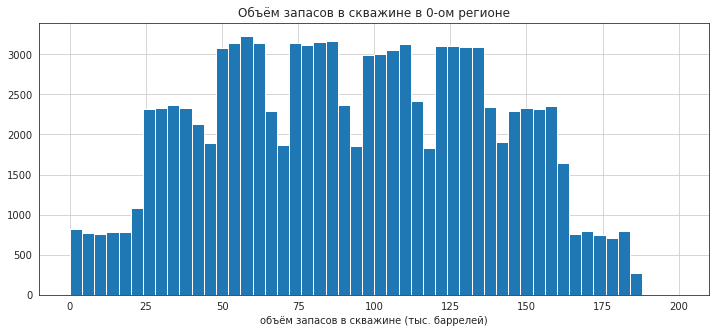

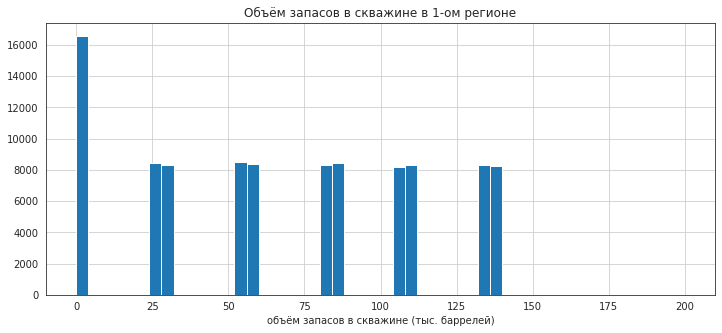

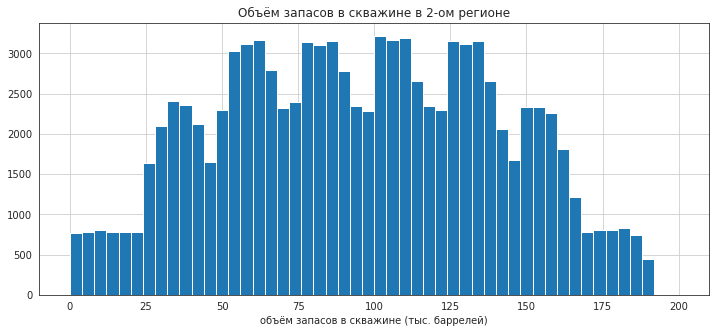

In [4]:
for i in range(3):
    data[i]['product'].hist(bins=50, range = (0, 200), figsize = [12,5]) 
    plt.title('Объём запасов в скважине в ' + str(i) + '-ом регионе', fontsize=12)
    plt.xlabel('объём запасов в скважине (тыс. баррелей)')
    plt.show()

Мне кажется, что нельзя какие-то данные назвать выбросами для каждого из 3-ех графиков.

Удалим колонку id в каждой из таблиц. Она не будет интересна для обучения.

In [5]:
for i in data:
    i.drop(['id'], axis=1, inplace = True)

### Вывод:
- В данных отсутствуют пропуски.
- Замены не требуются. 
- Выбросов нет.

Можно приступать к дальнейшему анализу.

# 2. Обучение и проверка модели

**Разобьем данные на выборки**

Разобъем данные на 2 выборки: обучающую, валидационную в соотношении: 75/25.

In [6]:
data_train = []
data_valid = []
for i in range(3):
    b_train, b_valid = train_test_split(data[i], test_size=0.25, random_state=12345)
    data_train.append(b_train)
    data_valid.append(b_valid)

In [7]:
#Мвссив для моделей
model = []
for i in range(3):
    #Для анализа зафиксируем признаки в переменных features_, а целевой признак в target_ для каждой выборки.
    #Обучающая выборка
    features_train = data_train[i].drop(['product'], axis=1)
    target_train = data_train[i]['product']
    #Валидационная выборка
    features_valid = data_valid[i].drop(['product'], axis=1)
    target_valid = data_valid[i]['product']
    
    #Обучим для каждого региона логистичексую регрессию
    model_b = LinearRegression()
    model_b.fit(features_train, target_train)
    predicted_valid = model_b.predict(features_valid)
    model.append(model_b)
    
    #Рассчитаем средний запас предсказанного сырья.
    mean = predicted_valid.mean()
    print("Средний запас предсказанного сырья для региона", i, ':', mean, "тыс. баррелей")

    #Расчитаем RMSE.
    mse = mean_squared_error(target_valid, predicted_valid)
    rmse = mse**0.5

    print("RMSE для региона", i, ':', rmse)

Средний запас предсказанного сырья для региона 0 : 92.59256778438038 тыс. баррелей
RMSE для региона 0 : 37.5794217150813
Средний запас предсказанного сырья для региона 1 : 68.728546895446 тыс. баррелей
RMSE для региона 1 : 0.893099286775616
Средний запас предсказанного сырья для региона 2 : 94.96504596800489 тыс. баррелей
RMSE для региона 2 : 40.02970873393434


### Вывод

Получены результаты средних предсказанных запасов сырья и значений RMSE для каждого региона.

Можно сказать, что данные имеют более сложную структуру в 1-ом и 3-ем регионах, поэтому ошибки так велики. Во 2-ом регионе данные имеют структуру проще, поэтому модель справляется хорошо.

# 3. Подготовка к расчёту прибыли

**Ключевые значения для расчётов сохраним в отдельных переменных.**

In [8]:
#Бюджет на разработку скважин в регионе в рублях.
budget_dev_region = 10000000000

#Доход 1-го барреля сырья в рублях.
revenue_barrel_1 = 450

#Доход с каждой единицы продукта в рублях.
revenue_product_1 = 450000

#Порог вероятности убытков в %.
threshold_los = 0.025

**Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.**

In [9]:
sufficient_vol = round(budget_dev_region/revenue_product_1, 2)
print("Достаточный объём сырья для безубыточной разработки новой скважины:", sufficient_vol, "тыс. баррелей")
print("Достаточный средний запас сырья в скважине при условии бурения 200 скважин с максимальными ожидаемыми запасами:", round(sufficient_vol/200,2), "тыс. баррелей")

Достаточный объём сырья для безубыточной разработки новой скважины: 22222.22 тыс. баррелей
Достаточный средний запас сырья в скважине при условии бурения 200 скважин с максимальными ожидаемыми запасами: 111.11 тыс. баррелей


#### Вывод
Видим, что средний объем запасов в скважинах в каждом из регионе меньше достаточного для безубыточной разработки. Поэтому нельзя выбирать произвольные скважины, необходимо выбрать наиболее прибыльные.

**Сделаем предсказание объема запасов на полных выборках.**

In [10]:
predict = []
for i in range(3):
    predict.append(pd.Series(model[i].predict(data[i].drop(['product'], axis=1))))

In [11]:
#features_0 = data_0.drop(['product'], axis=1)
#target_0 = data_0['product']

**Напишишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели.**

In [12]:
#Напишем функцию подсчета прибыли.
def revenue(target, predict, count):
    probs_sorted = predict.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return round(revenue_product_1* selected.sum() - budget_dev_region, 2)

### Вывод
В ходе анализа получено, что:
- достаточный объём сырья для безубыточной разработки новой скважины: 22222.22 тыс. баррелей,
- достаточный средний запас сырья в скважине при условии бурения 200 скважин с максимальными ожидаемыми запасами: 111.11 тыс. баррелей.

При этом:
- средний запас предсказанного сырья для 0-го региона: 92.59 тыс. баррелей,
- средний запас предсказанного сырья для 1-го региона: 68.73 тыс. баррелей,
- средний запас предсказанного сырья для 2-го региона: 94.97 тыс. баррелей.

Видим, что средний объем запасов в скважинах в каждом из регионе меньше достаточного для безубыточной разработки. Поэтому нельзя выбирать произвольные скважины, необходимо выбрать наиболее прибыльные.

Подготовка к расчетам завершена.

# 4. Расчёт прибыли и рисков 

**Сделаем расчеты для каждого региона.**

Средняя выручка для региона 0 : 431092313.49556
95%-й доверительный интервал: [-70541767.3, 979019659.05]
Риск убытков: 5.1 %
Регион не подходит для добычи.


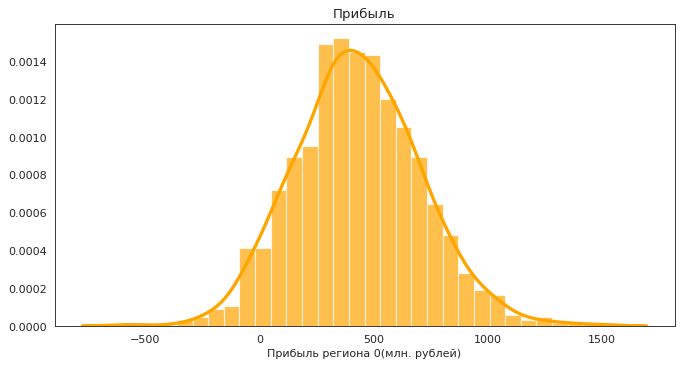

Средняя выручка для региона 1 : 450071682.61043
95%-й доверительный интервал: [44596630.5, 830796301.53]
Риск убытков: 1.0 %
Регион подходит для добычи.


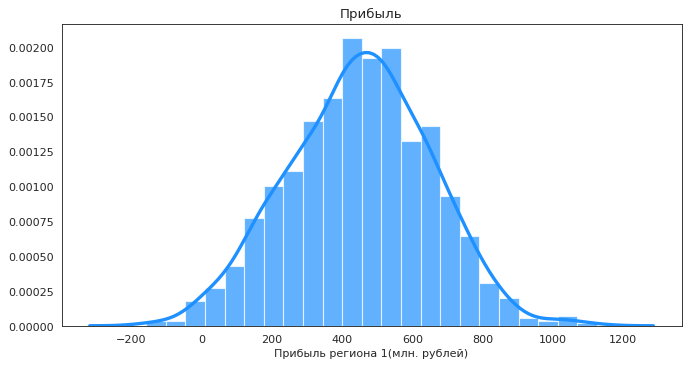

Средняя выручка для региона 2 : 392180188.42911005
95%-й доверительный интервал: [-148308503.9, 884150739.87]
Риск убытков: 8.3 %
Регион не подходит для добычи.


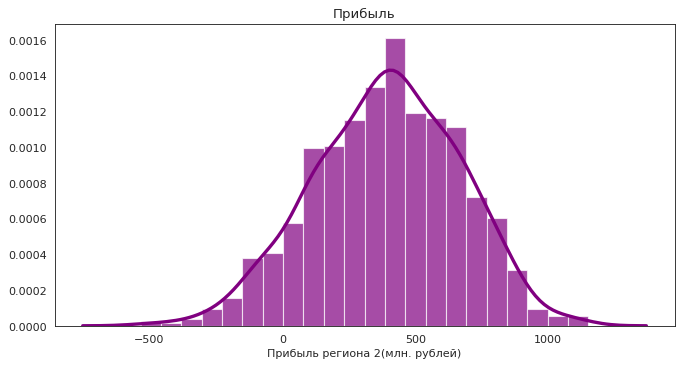

In [13]:
state = np.random.RandomState(12345)
colors = ["orange", "dodgerblue", "purple"]

for j in range(3):
    values = []
    for i in range(1000):
        target_subsample = data[j]['product'].sample(n=500, replace=True, random_state=state)
        probs_subsample = predict[j][target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample, 200))

    values = pd.Series(values)
    lower = round(values.quantile(0.025),2)
    upper = round(values.quantile(0.975),2)
    mean = values.mean()
    negative_profit_chance = (values < 0).mean()

    print("Средняя выручка для региона", j,":", mean)
    print("95%-й доверительный интервал:", [lower, upper])
    print("Риск убытков:", round(negative_profit_chance*100, 2), "%")

    if negative_profit_chance < threshold_los:
        print('Регион подходит для добычи.')
    else:
        print('Регион не подходит для добычи.')

    values_hist = values/1000000
    plt.figure(figsize=(10,5), dpi= 80)
    sns.distplot(values_hist, color=colors[j], hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    plt.title('Прибыль', fontsize=12)
    plt.xlabel('Прибыль региона ' + str(j) + '(млн. рублей)')
    plt.show()

### Вывод

По проведенному анализу для добычи можно предложить для разработки скважин регион 1. Регион подходит для добычи т.к. вероятность убытков для этого региона меньше 2.5%, а для регионов 0 и 2 больше.

Для предложенного для добычи региона:
- Средняя выручка для этого региона: 450 млн. рублей.
- Риск убытков: 1%.